In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats.distributions import norm
import scipy as sp
import math
from sklearn.decomposition import PCA
import matplotlib.colors as pltcolors

In [2]:
file_name = "GMM_tab_seperated"
def getData(file_name):
    file_handle = open(file_name + ".txt", "r")
    lines = file_handle.readlines()
    gene_ids = []
    ground_truth_clusters = []
    input_matrix = []
    for line in lines:
        row = line.strip().split("\t")
        if(row[1] != "-1"):
            gene_ids.append(int(row.pop(0)))
            ground_truth_clusters.append(int(row.pop(0)))
            att_list=[float(i) for i in row]
            input_matrix.append(att_list)
    return np.array(gene_ids), np.array(ground_truth_clusters), np.array(input_matrix)

In [3]:
gene_ids, ground_truth_cluster, input_matrix = getData(file_name)
#X = input_matrix

In [4]:
# k = 5
# cov_threshold = 1e-9
# smoothing_val = 1e-1
# variances=[]
# for i in range(k):
#     #var = np.around(np.random.random_sample(size=X.shape[1]), decimals=1)
#     var = []
#     for j in range(input_matrix.shape[1]):
#         var1 = round(np.random.uniform(0.01,0.99),2)
#         var.append(var1)
#     variances.append(var)

# weights = np.ones((k)) / k
# #weights.astype('int8')

# means=[]
# for row in range(0, k):
#     means.append(input_matrix[row])
# means = np.asmatrix(means)
# variances = np.array([np.asmatrix(np.diag(variances[i])) for i in range(k)])

In [5]:
k = 3

cov_threshold = 1e-9
smoothing_val = 1e-1

weights = np.array([0.5,0.5,0.2])
means=[[0,0],[3,3],[0,4]]

means = np.asmatrix(means)
variances = [[[1.0,0.4],[0.4,1.0]],[[1.0,0.0],[0.0,2.0]],[[0.4,0.0],[0.0,0.1]]]

variances = np.array([np.asmatrix(variances[i]) for i in range(3)])

In [6]:
variances.shape

(3, 2, 2)

In [7]:
for i in variances:
    np.fill_diagonal(i,i.diagonal()+smoothing_val)

In [8]:
def GMM(k, data, mean_vector, variance_vector, weight_vector, cov_thr):
    num_iters = 0
    l = 1
    w = np.asmatrix(np.empty((len(data), k), dtype=float))
    pl = 0
    while(l-pl > cov_thr):
        print(num_iters)
        for i in variance_vector:
            np.fill_diagonal(i,i.diagonal()+smoothing_val)
        print(type(variance_vector))
        pl = log_func(k, weight_vector, data, mean_vector, variance_vector)
        
        #E-step
        for i in range(len(data)):
            val = 0
            for j in range(k):

                num = sp.stats.multivariate_normal.pdf(data[i, :], np.squeeze(np.asarray(mean_vector[j])), variance_vector[j]) * weight_vector[j]
                val += num+0.0001
                w[i, j] = num+0.0001
            
            w[i, :] /= val
        
        #M-Step
        for j in range(k):
            
            mean_j = np.zeros(len(data[0]))
            var_j = np.zeros((len(data[0]), len(data[0])))
            
            const = w[:, j].sum()
            #print("Const",const)
            
            weight_vector[j] = 1/len(data) * const
           
            for i in range(len(data)):
                
                mean_j += (data[i, :] * w[i, j])
                
                
                var_j += w[i, j] * ((data[i, :] - mean_vector[j, :]).T * (data[i, :] - mean_vector[j, :]))


            mean_vector[j] = mean_j / const
            
            
            variance_vector[j] = var_j / const
            #print(variance_vector.shape)
        
        num_iters += 1
        if(num_iters ==100):
            print("Done!")
            return w
        l = log_func(k, weight_vector, data, mean_vector, variance_vector)
    print("Done.")
    return w

def log_func(k, weight_vector, data, mean_vector, variance_vector):
    l = 0
    print(type(mean_vector))
    
#     for e in variance_vector:
#         np.fill_diagonal(e,e.diagonal()+smoothing_val)
    for i in range(len(data)):
        v1 = 0
        for j in range(k):
#             for i in variances:
#                 np.fill_diagonal(i,i.diagonal()+smoothing_val)
            v1 += sp.stats.multivariate_normal.pdf(data[i, :], np.squeeze(np.asarray(mean_vector[j,:])), variance_vector[j,:],allow_singular = True) * weight_vector[j]
        l += np.log(v1) 
    return l

In [9]:
final_weights = GMM(k, input_matrix, means, variances, weights,cov_threshold)

0
<class 'numpy.ndarray'>
<class 'numpy.matrix'>
<class 'numpy.matrix'>
Done.


In [10]:
cluster_list=[]
for i in final_weights.tolist():
    cluster_list.append(i.index(max(i)))

In [11]:
cluster_list

[1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 1,


In [12]:
#Function to generate incidence matrices
def getIncidentMatrix(clusters):
    incident_mat=[]
    for i in range(len(clusters)):
        row_values = []
        val=0
        for j in range(len(clusters)):
            if(clusters[i]==clusters[j]):
                val=1
            row_values.append(val)
            val=0
        incident_mat.append(row_values)
    return incident_mat

In [13]:
ground_truth_incident = getIncidentMatrix(ground_truth_cluster)
    
cluster_list_incident = getIncidentMatrix(cluster_list)

In [14]:
#Function to calculate Rand and Jaccard values
def randAndJaccard(incident_ground_truth, incident_cluster_list):
    m00=0
    m01=0
    m10=0
    m11=0
    for i in range(len(incident_cluster_list)):
        for j in range(len(incident_cluster_list)):
            if(incident_cluster_list[i][j]==incident_ground_truth[i][j]):
                if(incident_cluster_list[i][j]==1):
                    m11=m11+1
                else:
                    m00=m00+1
            else:
                if(incident_cluster_list[i][j]==1):
                    m10=m10+1
                else:
                    m01=m01+1            

    rand = (m11+m00)/(m00+m11+m01+m10)
    jaccard = m11/(m11+m10+m01)
    return rand, jaccard

In [15]:
randID, jaccardCoeff = randAndJaccard(ground_truth_incident, cluster_list_incident)
print("Jaccard Coefficient:\t", jaccardCoeff)
print("Random ID:\t\t", randID)

Jaccard Coefficient:	 0.880667345899134
Random ID:		 0.955024


In [16]:
#Function to plot the data
def plotData(file_name, data,clusters):
    allcolors=[]
    for i in pltcolors.cnames.items():
        allcolors.append(i[0])
    plt.figure(figsize=(12,9))
    legend = list()
    classes = list(set(clusters))
    allcolors1 = ['red','deepskyblue','green','purple', 'brown', 'plum', 'darkcyan','blue','magenta','lightslategray','black','yellow','mediumpurple','cyan',]
    if(len(classes)>len(allcolors)):
        colors = [random.choice(allcolors) for i in range(len(classes))]
    else:
        colors = allcolors1
    for i in range(len(classes)):
        cluster_data = data[np.where(np.array(clusters) == classes[i])]
        legend.append(plt.scatter(cluster_data[:,0],cluster_data[:,1], c=colors[i], s=50, alpha=0.9))
        #plt.scatter(centroids[i][0],centroids[i][1], s=150, marker="x", c=colors[i], alpha = 0.9)
    plt.legend(legend,classes)
    plt.xlabel("Principle Component 1")
    plt.ylabel("Principle Component 2")
    plt.title("PCA visualization for GMM Clustering and "+file_name+".txt file")
    plt.savefig("GMM_"+file_name+'.png')
    plt.show()

In [17]:
def getData1(file_name):
    file_handle = open(file_name + ".txt", "r")
    lines = file_handle.readlines()
    gene_ids = []
    ground_truth_clusters = []
    input_matrix1 = []
    for line in lines:
        row = line.strip().split("\t")
        if(row[1] == "-1"):
            gene_ids.append(int(row.pop(0)))
            ground_truth_clusters.append(int(row.pop(0)))
            att_list=[float(i) for i in row]
            input_matrix1.append(att_list)
    return np.array(gene_ids), np.array(ground_truth_clusters), np.array(input_matrix1)

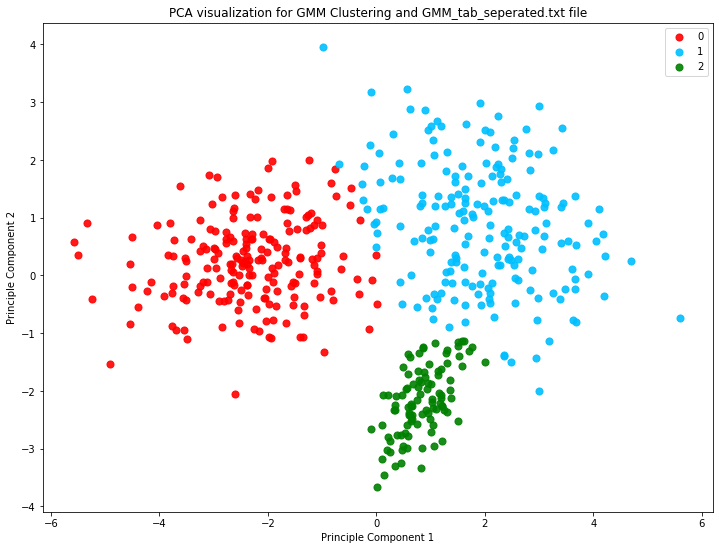

In [18]:

pca_data = PCA(n_components=2).fit_transform(input_matrix)


gid, gtc, input_1 = getData1(file_name)
if(len(input_1) is not 0):
    pca_gtc_data = PCA(n_components=2).fit_transform(input_1)
    gtc_clus = [-1]*len(pca_gtc_data)
    cluster_list = cluster_list+gtc_clus
    pca_data = np.concatenate((pca_data, pca_gtc_data))
    
plotData(file_name, pca_data, cluster_list)